In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
# Load the dataset
stroke_data = pd.read_csv("/content/drive/MyDrive/preprocessed_stroke.csv")

# Display the first few rows
stroke_data.head()


,Unnamed: 0,chest_pain,shortness_of_breath,irregular_heartbeat,fatigue___weakness,dizziness,swelling__edema_,pain_neck_jaw_shoulder_back,excessive_sweating,persistent_cough,nausea_vomiting,high_blood_pressure,chest_discomfort__activity_,cold_hands_feet,snoring_sleep_apnea,anxiety_feeling_of_doom,age,prec_stroke_risk,bin_stroke_risk
0,0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,0.500000,0.580,1
1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0.430556,0.405,0
2,2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0.611111,0.520,1
3,3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0.416667,0.600,1
4,4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0.597222,0.565,1


 Split the data into (training, validation, testing)

In [ ]:
stroke_data.iloc[[5]]

,Unnamed: 0,chest_pain,shortness_of_breath,irregular_heartbeat,fatigue___weakness,dizziness,swelling__edema_,pain_neck_jaw_shoulder_back,excessive_sweating,persistent_cough,nausea_vomiting,high_blood_pressure,chest_discomfort__activity_,cold_hands_feet,snoring_sleep_apnea,anxiety_feeling_of_doom,age,prec_stroke_risk,bin_stroke_risk
5,5,1,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0.222222,0.43,0


In [ ]:

# Separate features and target
X = stroke_data.drop('bin_stroke_risk', axis=1)
y = stroke_data['bin_stroke_risk']
target = 'at_risk__binary_'

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)  # 0.1765 x 0.85 ≈ 0.15 total val

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (48998, 18)
Validation: (10502, 18)
Test: (10500, 18)


 balance the data:

In [ ]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training dataset shape: {X_train.shape}")
print(f"Resampled training dataset shape: {X_train_resampled.shape}")

from collections import Counter
print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_train_resampled)}")


Original training dataset shape: (48998, 18)
Resampled training dataset shape: (63618, 18)
Before SMOTE: Counter({1: 31809, 0: 17189})
After SMOTE: Counter({0: 31809, 1: 31809})


# **Models**

# **1. TabNet Model**

TabNet is a deep learning architecture that uses attention-based feature selection in a sequential decision process.
It automatically selects relevant features at each step, providing interpretability and strong performance on structured/tabular data.

TabNet uses sequential attention to choose which features to reason from at each decision step, allowing for interpretability and high performance.

It’s designed specifically for tabular data and is known for both accuracy and explainability, making it suitable for sensitive fields like healthcare.

In [ ]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:

from sklearn.metrics import accuracy_score, classification_report , recall_score, f1_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
clf = TabNetClassifier(
    n_d=32, n_a=32, n_steps=5,
    gamma=1.5, lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
from pytorch_tabnet.callbacks import Callback

class MetricsHistory(Callback):
    def __init__(self):
        self.train_accuracy = []
        self.valid_accuracy = []
        self.valid_loss = []

    def on_epoch_end(self, epoch, logs=None):

        if 'train_accuracy' in logs:
            self.train_accuracy.append(logs['train_accuracy'])
        if 'valid_accuracy' in logs:
            self.valid_accuracy.append(logs['valid_accuracy'])
        if 'loss' in logs:
            self.valid_loss.append(logs['loss'])


In [ ]:
X_train_resampled = X_train_resampled.values
y_train_resampled = y_train_resampled.values
X_val = X_val.values
y_val = y_val.values
X_test = X_test.values
y_test = y_test.values

In [ ]:

metrics_history = MetricsHistory()

history = clf.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_train_resampled, y_train_resampled), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    callbacks=[metrics_history]
)

epoch 0  | loss: 0.15526 | train_accuracy: 0.50069 | valid_accuracy: 0.64997 |  0:00:41s
epoch 1  | loss: 0.03351 | train_accuracy: 0.55088 | valid_accuracy: 0.69158 |  0:01:00s
epoch 2  | loss: 0.03588 | train_accuracy: 0.70942 | valid_accuracy: 0.78899 |  0:01:13s
epoch 3  | loss: 0.02207 | train_accuracy: 0.8264  | valid_accuracy: 0.86203 |  0:01:28s
epoch 4  | loss: 0.02379 | train_accuracy: 0.87841 | valid_accuracy: 0.89659 |  0:01:41s
epoch 5  | loss: 0.0289  | train_accuracy: 0.95927 | valid_accuracy: 0.95848 |  0:01:54s
epoch 6  | loss: 0.02242 | train_accuracy: 0.97792 | valid_accuracy: 0.97439 |  0:02:07s
epoch 7  | loss: 0.02411 | train_accuracy: 0.98953 | valid_accuracy: 0.98619 |  0:02:20s
epoch 8  | loss: 0.02055 | train_accuracy: 0.99068 | valid_accuracy: 0.98657 |  0:02:33s
epoch 9  | loss: 0.02282 | train_accuracy: 0.99961 | valid_accuracy: 0.99971 |  0:02:46s
epoch 10 | loss: 0.01931 | train_accuracy: 0.99906 | valid_accuracy: 0.99752 |  0:02:59s
epoch 11 | loss: 0.02

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
clf.save_model("content/drive/MyDrive/tabnet_stroke_model")


Successfully saved model at content/drive/MyDrive/tabnet_stroke_model.zip


'content/drive/MyDrive/tabnet_stroke_model.zip'

# **Prediction**

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))
print("recall  :", recall_score (y_test, y_pred))


Accuracy: 1.0
precision: 1.0
f1 score: 1.0
recall  : 1.0


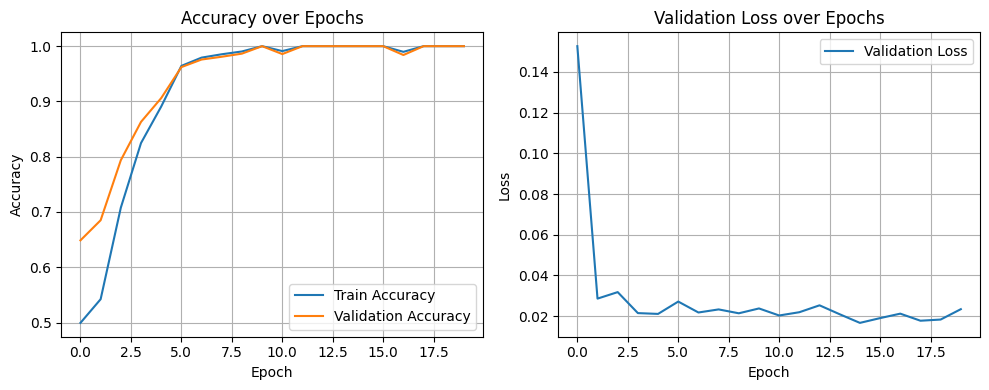

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(metrics_history.train_accuracy, label='Train Accuracy')
plt.plot(metrics_history.valid_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Validation Loss Only
plt.subplot(1, 2, 2)
plt.plot(metrics_history.valid_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


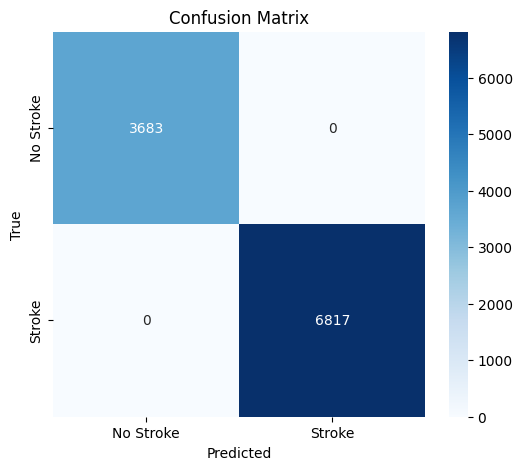

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Testing**

In [ ]:
# Select one sample
sample = stroke_data.iloc[[100]]

# Drop target column (if present)
sample_input = sample.drop(columns=["bin_stroke_risk"]).values

# Predict using TabNet model
pred = clf.predict(sample_input)
prob = clf.predict_proba(sample_input)

print("Predicted Class:", pred[0])
print("Probability of Stroke:", prob[0][1])


Predicted Class: 1
Probability of Stroke: 1.0


In [ ]:
# Select one sample
sample =stroke_data.iloc[[5]]

# Drop target column (if present)
sample_input = sample.drop(columns=["bin_stroke_risk"]).values

# Predict using TabNet model
pred = clf.predict(sample_input)
prob = clf.predict_proba(sample_input)

print("Predicted Class:", pred[0])
print("Probability of Stroke:", prob[0][1])


Predicted Class: 0
Probability of Stroke: 6.2100305e-08


### FineTuning tabnet

In [ ]:
clf = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax',
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:

metrics_history = MetricsHistory()
history = clf.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_train_resampled, y_train_resampled), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    callbacks=[metrics_history]
)

epoch 0  | loss: 0.75067 | train_accuracy: 0.6521  | valid_accuracy: 0.64302 |  0:00:05s
epoch 1  | loss: 0.40873 | train_accuracy: 0.73385 | valid_accuracy: 0.73119 |  0:00:12s
epoch 2  | loss: 0.29334 | train_accuracy: 0.78897 | valid_accuracy: 0.78595 |  0:00:18s
epoch 3  | loss: 0.21962 | train_accuracy: 0.85666 | valid_accuracy: 0.84774 |  0:00:24s
epoch 4  | loss: 0.15768 | train_accuracy: 0.90427 | valid_accuracy: 0.89059 |  0:00:31s
epoch 5  | loss: 0.11652 | train_accuracy: 0.9453  | valid_accuracy: 0.93173 |  0:00:37s
epoch 6  | loss: 0.08801 | train_accuracy: 0.96718 | valid_accuracy: 0.95782 |  0:00:43s
epoch 7  | loss: 0.06888 | train_accuracy: 0.97913 | valid_accuracy: 0.97086 |  0:00:49s
epoch 8  | loss: 0.05615 | train_accuracy: 0.987   | valid_accuracy: 0.98162 |  0:00:56s
epoch 9  | loss: 0.04708 | train_accuracy: 0.99205 | valid_accuracy: 0.98829 |  0:01:03s
epoch 10 | loss: 0.04516 | train_accuracy: 0.99223 | valid_accuracy: 0.988   |  0:01:09s
epoch 11 | loss: 0.04

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))
print("recall  :", recall_score (y_test, y_pred))


Accuracy: 0.9985714285714286
precision: 0.9994126284875183
f1 score: 0.9988992441476481
recall  : 0.9983863869737422


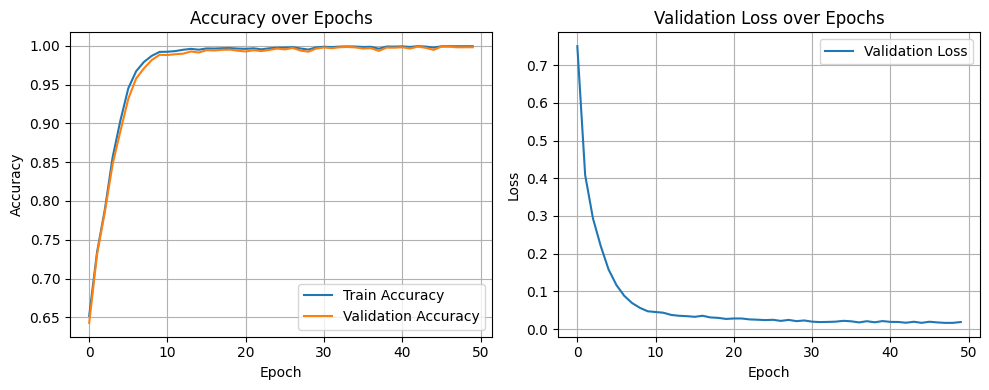

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(metrics_history.train_accuracy, label='Train Accuracy')
plt.plot(metrics_history.valid_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Validation Loss Only
plt.subplot(1, 2, 2)
plt.plot(metrics_history.valid_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


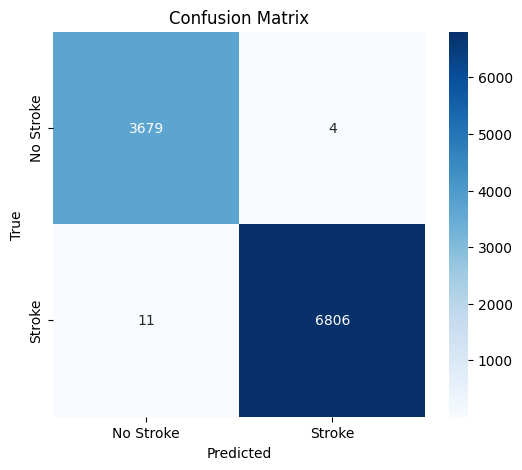

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Select one sample
sample = stroke_data.iloc[[90]]

# Drop target column (if present)
sample_input = sample.drop(columns=["bin_stroke_risk"]).values

# Predict using TabNet model
pred = clf.predict(sample_input)
prob = clf.predict_proba(sample_input)

print("Predicted Class:", pred[0])
print("Probability of Stroke:", prob[0][1])


Predicted Class: 1
Probability of Stroke: 1.0


In [ ]:
# Select one sample
sample =stroke_data.iloc[[1]]

# Drop target column (if present)
sample_input = sample.drop(columns=["bin_stroke_risk"]).values

# Predict using TabNet model
pred = clf.predict(sample_input)
prob = clf.predict_proba(sample_input)

print("Predicted Class:", pred[0])
print("Probability of Stroke:", prob[0][1])


Predicted Class: 0
Probability of Stroke: 6.2100305e-08


# **2. DNN Model**

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scale the data for the DNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    GaussianNoise(0.1),
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,  activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32,  activation='relu'),
    Dense(1,   activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

history = model.fit(
    X_train_scaled, y_train_resampled,
    validation_data=(X_val_scaled, y_val),
    epochs=50, batch_size=32,
    callbacks=callbacks
)


Epoch 1/50
1985/1989 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8829 - loss: 0.2619

1989/1989 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.8830 - loss: 0.2617 - val_accuracy: 0.9838 - val_loss: 0.0818 - learning_rate: 5.0000e-04
Epoch 2/50
1983/1989 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9552 - loss: 0.1191

1989/1989 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9553 - loss: 0.1191 - val_accuracy: 0.9908 - val_loss: 0.0646 - learning_rate: 5.0000e-04
Epoch 3/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9648 - loss: 0.0994 - val_accuracy: 0.9896 - val_loss: 0.0629 - learning_rate: 5.0000e-04
Epoch 4/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9730 - loss: 0.0766 - val_accuracy: 0.9880 - val_loss: 0.0583 - learning_rate: 5.0000e-04
Epoch 5/50
1987/1989 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9743 - loss: 0.0719

1989/1989 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9743 - loss: 0.0719 - val_accuracy: 0.9911 - val_loss: 0.0567 - learning_rate: 5.0000e-04
Epoch 6/50
1985/1989 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0657

1989/1989 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9769 - loss: 0.0657 - val_accuracy: 0.9917 - val_loss: 0.0485 - learning_rate: 5.0000e-04
Epoch 7/50
1986/1989 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9789 - loss: 0.0607

1989/1989 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9789 - loss: 0.0607 - val_accuracy: 0.9949 - val_loss: 0.0443 - learning_rate: 5.0000e-04
Epoch 8/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9805 - loss: 0.0572 - val_accuracy: 0.9921 - val_loss: 0.0453 - learning_rate: 5.0000e-04
Epoch 9/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9807 - loss: 0.0548 - val_accuracy: 0.9913 - val_loss: 0.0424 - learning_rate: 5.0000e-04
Epoch 10/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9812 - loss: 0.0543 - val_accuracy: 0.9890 - val_loss: 0.0445 - learning_rate: 5.0000e-04
Epoch 11/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9827 - loss: 0.0514 - val_accuracy: 0.9911 - val_loss: 0.0467 - learning_rate: 5.0000e-04
Epoch 12/50
1980/1989 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9817 - loss: 0.0519

1989/1989 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9817 - loss: 0.0519 - val_accuracy: 0.9950 - val_loss: 0.0430 - learning_rate: 5.0000e-04
Epoch 13/50
1986/1989 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0531

1989/1989 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9803 - loss: 0.0531 - val_accuracy: 0.9959 - val_loss: 0.0389 - learning_rate: 5.0000e-04
Epoch 14/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9833 - loss: 0.0493 - val_accuracy: 0.9938 - val_loss: 0.0388 - learning_rate: 5.0000e-04
Epoch 15/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9817 - loss: 0.0519 - val_accuracy: 0.9932 - val_loss: 0.0470 - learning_rate: 5.0000e-04
Epoch 16/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9815 - loss: 0.0509 - val_accuracy: 0.9930 - val_loss: 0.0441 - learning_rate: 5.0000e-04
Epoch 17/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9818 - loss: 0.0488 - val_accuracy: 0.9943 - val_loss: 0.0427 - learning_rate: 5.0000e-04
Epoch 18/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9822 - loss: 0.0497 - val_accuracy: 0.9934 - val_loss: 0.0421 - learning_rate: 5.0000e-04
Epoch 19/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/ste

1989/1989 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9827 - loss: 0.0481 - val_accuracy: 0.9971 - val_loss: 0.0422 - learning_rate: 2.5000e-04
Epoch 22/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9840 - loss: 0.0446 - val_accuracy: 0.9923 - val_loss: 0.0403 - learning_rate: 2.5000e-04
Epoch 23/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9839 - loss: 0.0455 - val_accuracy: 0.9897 - val_loss: 0.0403 - learning_rate: 2.5000e-04
Epoch 24/50
1989/1989 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9832 - loss: 0.0464 - val_accuracy: 0.9951 - val_loss: 0.0406 - learning_rate: 1.2500e-04


In [ ]:
model.save("'content/drive/MyDrive/DNNstroke_model.h5")


# **Prediction**


Test Loss: 0.0285
Test Accuracy: 0.9969
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Precision: 0.9984
Test Recall: 0.9968
Test F1 Score: 0.9976


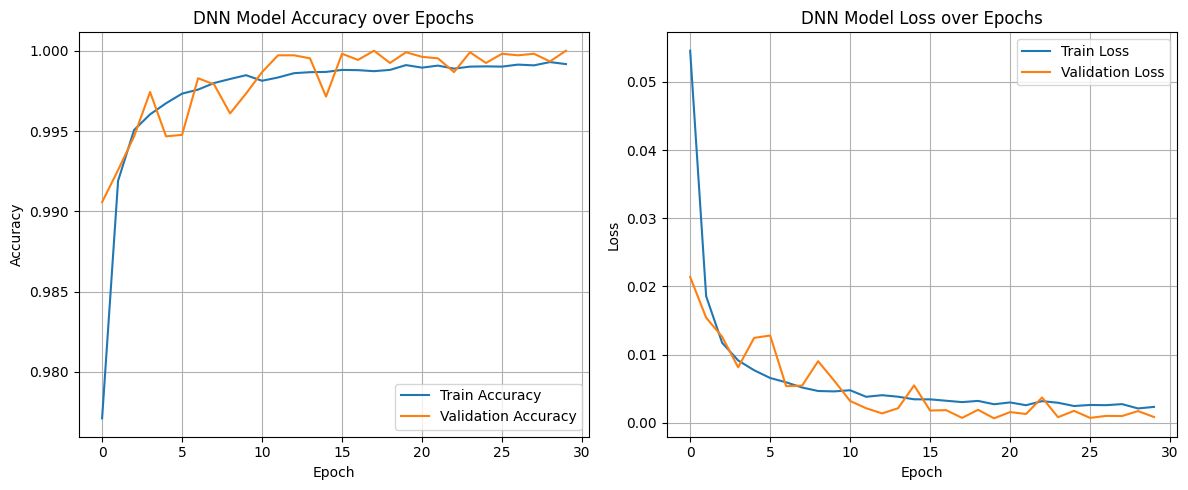

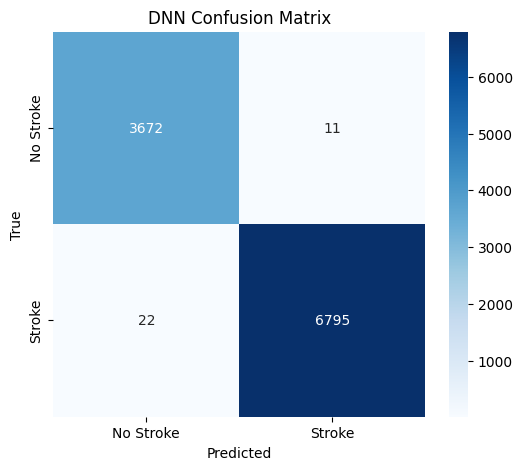

In [ ]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred_dnn = (y_pred_prob > 0.5).astype("int32")

# Calculate additional metrics
precision = precision_score(y_test, y_pred_dnn)
recall = recall_score(y_test, y_pred_dnn)
f1 = f1_score(y_test, y_pred_dnn)
conf_matrix_dnn = confusion_matrix(y_test, y_pred_dnn)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Plot training history (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('DNN Model Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DNN Model Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Confusion Matrix for DNN
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dnn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('DNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
stroke_data

,Unnamed: 0,chest_pain,shortness_of_breath,irregular_heartbeat,fatigue___weakness,dizziness,swelling__edema_,pain_neck_jaw_shoulder_back,excessive_sweating,persistent_cough,nausea_vomiting,high_blood_pressure,chest_discomfort__activity_,cold_hands_feet,snoring_sleep_apnea,anxiety_feeling_of_doom,age,prec_stroke_risk,bin_stroke_risk
0,0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,0.500000,0.580,1
1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0.430556,0.405,0
2,2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0.611111,0.520,1
3,3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0.416667,0.600,1
4,4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0.597222,0.565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0.000000,0.300,0
69996,69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0.083333,0.330,0
69997,69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0.430556,0.455,0
69998,69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0.375000,0.485,0


# **Testing:**

In [ ]:
def predict_sample_dnn(model, scaler, df, target_col="bin_stroke_risk"):
    sample = df.sample(n=1, random_state=42)
    sample_input = sample.drop(columns=[target_col])
    sample_scaled = scaler.transform(sample_input)
    prob = model.predict(sample_scaled)[0][0]
    pred = int(prob > 0.5)

    print(f"Predicted probability: {prob:.4f}")
    print(f"Predicted class: {pred}")
    return prob, pred
predict_sample_dnn(model, scaler, stroke_data.iloc[[5]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted probability: 0.0004
Predicted class: 0


(np.float32(0.00036585706), 0)

In [ ]:
predict_sample_dnn(model, scaler, stroke_data.iloc[[1]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted probability: 0.0001
Predicted class: 0


(np.float32(5.8011e-05), 0)

In [ ]:
predict_sample_dnn(model, scaler, stroke_data.iloc[[100]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted probability: 1.0000
Predicted class: 1


(np.float32(0.9999998), 1)